# RNN
- use for text and tie series.
- reccuring of layer 


## Data for Rnn

- eg. reviews, comments, sales data of time series data. 
- The data used is in continue sequence in time series. 


## use cases of RNN
- 1. Auto comlation of sent. in search engine and mails. 
- 2. Translations to variois languages
- 3. Name Entity recognition
- 4. Voice recongnisation. 

# Why RNN over ANN for sequential data

- There is no fixed input values in RNN, it can take 10 input and also can take 100 input for the same model, which is not possible in ANN.


## RNN Architecture

- input => Neural Network with feedback loop => Output

## Type of RNN

- 1. One to One RNN  (One input and one output)
        - eg: Image recognition
        
- 2. One to many  (one input and many output)
        - eg: Music Generation, Image Caption
        
- 3. Many to One (Many input and one output)
        - eg: Sentiment analysis, Text Summarization
        
- 4. Manay to Many (Many inputs and many output)
        - eg: Language Translation, Time series Prediction, Named Entity
        

## Vanishing Gradient & Exploding Gradient

* Final Gradient = d1 * d2

* Vanishing Gradient
- The smaller gradient values (d1*d2) which doesnot add anything to the learning of the model is called vanishing gradient
- it's common problem in RNN
- 



* Exploding Gradient
- The bigger gradient values (d1*d2) which overshaddow the input called Exploding gradient

# Long short term Memory (RNN)

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# import data

data = pd.read_csv('F:\Skillenable\Data frames\monthly_milk_production (1).csv')
data.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [4]:
# convert object dataset into datetime format while loading data itself and indexing

data = pd.read_csv('F:\Skillenable\Data frames\monthly_milk_production (1).csv', index_col = 'Date', parse_dates= True)
data.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [5]:
data.shape

(168, 1)

<AxesSubplot:xlabel='Date'>

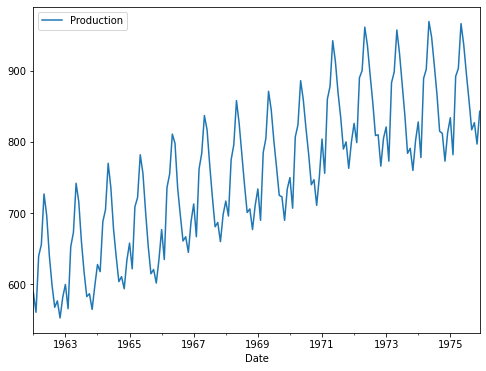

In [6]:
data.plot(figsize= (8,6))   # plotting the data

In [7]:
# saperate the data as train and test
len(data)-12  # taking last 12 data as test data

156

In [8]:
train = data.iloc[:156]
test = data.iloc[156:]

In [9]:
len(train), len(test)

(156, 12)

In [10]:
# NOrmalizing the data
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()  # assigning the object

In [12]:
train_scale = scaler.fit_transform(train) # scaled the data
test_scale = scaler.fit_transform(test)

In [13]:
test_scale

array([[0.2826087 ],
       [0.        ],
       [0.59782609],
       [0.6576087 ],
       [1.        ],
       [0.8423913 ],
       [0.61956522],
       [0.41304348],
       [0.19021739],
       [0.24456522],
       [0.08152174],
       [0.33152174]])

In [14]:
# 
from keras.preprocessing.sequence import TimeseriesGenerator


In [19]:
# We will take 12 values to predict the time series data 

n_input =12
generator = TimeseriesGenerator(train_scale, train_scale, length = n_input, batch_size = 1)

In [25]:
train_scale[:12]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154]])

In [28]:
generator[0]    #IT'S OUR FIRST GENERATOR OF FIRST INDEX; give first 12 data

(array([[[0.08653846],
         [0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154]]]),
 array([[0.11298077]]))

In [29]:
 # import all the packages which we are going to use
    
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

## Initializing the RNN

In [30]:
# Defining the model

rnn = Sequential()

## Adding input & hidden layers


In [32]:
rnn.add(LSTM(units=100, activation = 'relu', input_shape= (n_input, 1)))

## output layer

In [34]:
rnn.add(Dense(units=1)) ## output = 1

## Compiling the model

In [35]:
rnn.compile(optimizer= 'adam', loss='mse')

## Fitting the model


In [36]:
rnn.fit(generator, epochs=50)

Epoch 1/50
144/144 [==============================] - 4s 9ms/step - loss: 0.0467
Epoch 2/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0216
Epoch 3/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0185
Epoch 4/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0142
Epoch 5/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0078
Epoch 6/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0072
Epoch 7/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0077
Epoch 8/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0052
Epoch 9/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0048
Epoch 10/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0057
Epoch 11/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0052
Epoch 12/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0048
Epoch 13/50
144/14

In [37]:
test_scale

array([[0.2826087 ],
       [0.        ],
       [0.59782609],
       [0.6576087 ],
       [1.        ],
       [0.8423913 ],
       [0.61956522],
       [0.41304348],
       [0.19021739],
       [0.24456522],
       [0.08152174],
       [0.33152174]])

In [41]:
predict_train = train_scale[-12:]  #last 12 val

In [42]:
predict_train = predict_train.reshape(1,n_input,1)

In [43]:
predict_train.shape   #3d data

(1, 12, 1)

In [39]:
rnn.predict(train_scale[-12:])

array([[0.060408  ],
       [0.04888118],
       [0.074807  ],
       [0.07793832],
       [0.09435412],
       [0.08891698],
       [0.079391  ],
       [0.06957249],
       [0.05738595],
       [0.05669088],
       [0.04774287],
       [0.05692247]], dtype=float32)

In [45]:
rnn.predict(predict_train)  # prediction of first data after scaling

array([[0.63923174]], dtype=float32)

In [47]:
test_scale[0]   #here we can see the difference in predicted and real value

array([0.2826087])